# 2. 데이터 다루기

2-1. Training set and Test set

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 왜 score가 0이 나올까?

-> 훈련하는 데이터와 테스트 하는 데이터에 적절하게 데이터들이 섞여있어야 됨 (Sampling bias, 샘플링 편향)

In [ ]:
import numpy as np

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

## 데이터 전처리

### Numpy로 데이터 전처리

- column_stack
- ones, zeros
- concatenate

In [2]:
import numpy as np



In [4]:
# column_stack: 전달받은 리스트 tuple을 일렬로 세우고 나란히 연결

np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
# ones, zeros

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 훈련 세트와 데이터 세트 나누기

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [9]:
fish_data = np.column_stack((fish_length, fish_weight))

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42
)

문제점: 정말 랜덤하게 배정해서 샘플링 편향이 일어날 수 있음

-> 해결책: `train_test_split`에 `stratify` 매개변수에 타깃 데이터 전달, 클래스 비율에 맞게 훈련 데이터 나눔

-> 훈련데이터 작거나 특정 클래스 샘플 개수가 적을 때 활용한다.


In [11]:
from sklearn. neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
print(kn.predict([[25, 150]]))

[0.]


## 이게 무슨일일까..?

못 믿겠으면 산점도를 그려봐라

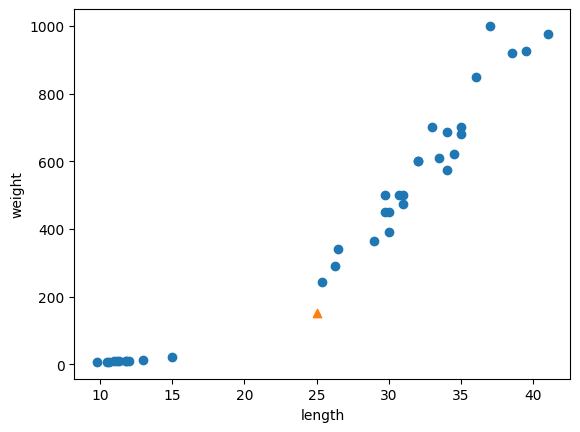

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # plot에 마커 찍기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
distances, indexes = kn.kneighbors([[25, 150]])

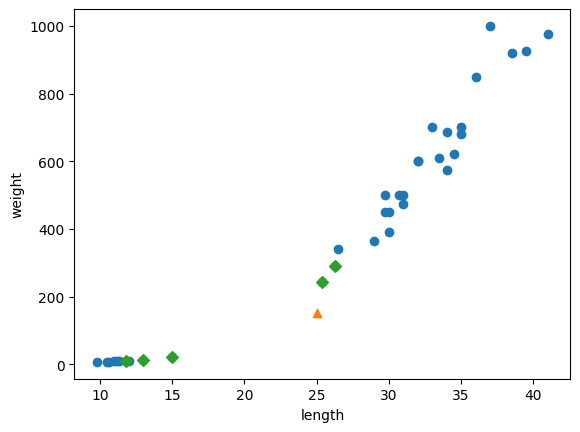

In [15]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # plot에 마커 찍기
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이상한 점

그림상 도미랑 더 가까워 보이는데 웨 빙어가 이웃으로 잡힘

-> y scale과 x scale이 다름!

-> y scale이 100 단위로 증가하는데 x scale은 5 단위로 증가하자나

### 그럼 데이터 스케일을 변경해야지

뭘로?

-> 표준편차로 (z-score)

In [16]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [17]:
train_scaled = (train_input - mean) / std

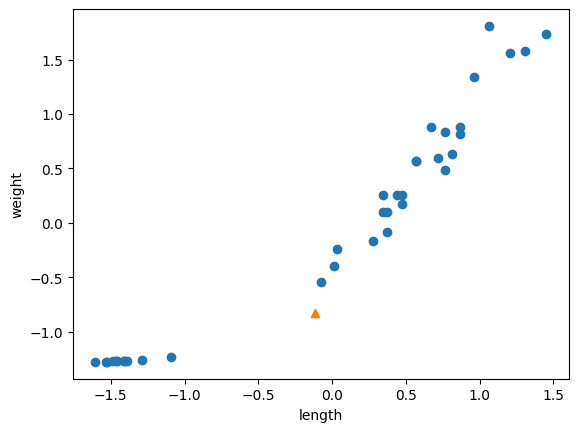

In [18]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [20]:
test_scaled = (test_input - mean) / std

In [21]:
kn.score(test_scaled, test_target)

1.0

In [22]:
kn.predict([[25, 150]])

array([1.])

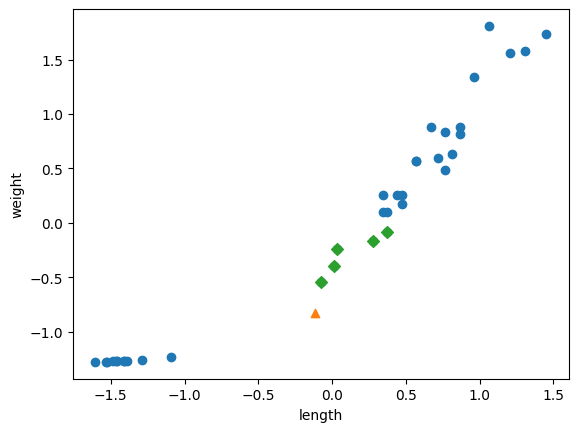

In [25]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^') # plot에 마커 찍기
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()